# Handling the imbalance datasets

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv('creditcard.csv')

In [99]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [100]:
import seaborn as sns

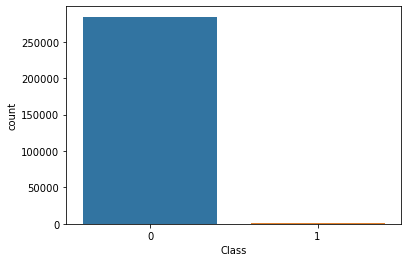

In [101]:
sns.countplot(x="Class",data=df);

In [33]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [36]:
np.random.seed(42)
X = df.drop('Class',axis=1)
y = df['Class']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
from xgboost import XGBClassifier

In [40]:
boost_model = XGBClassifier()

In [41]:
boost_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
boost_model.score(X_test,y_test)

0.9996313331694814

In [47]:
print(f'The accuracy score using the boosting is:{boost_model.score(X_test,y_test)*100:.2f}%')

The accuracy score using the boosting is:99.96%


# We will start by separating the class that will be 0 and class 1.

In [48]:
class_0 = df[df['Class']==0]

In [50]:
class_1 = df[df['Class']==1]

In [51]:
class_0.shape

(284315, 31)

In [52]:
class_1.shape

(492, 31)

# Random UnderSampling

> Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.But a drawback to undersampling is that we are removing information that may be valuable.

In [54]:
class_count_0, class_count_1 = df['Class'].value_counts()

In [57]:
class_0_under = class_0.sample(class_count_1)

In [59]:

class_0_under.shape

(492, 31)

In [64]:
class_1.shape

(492, 31)

In [60]:
test_under = pd.concat([class_0_under,class_1])

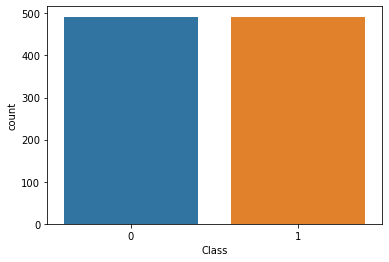

In [63]:
sns.countplot(x="Class",data=test_under);

# Random Oversampling

In [65]:
class_1_over = class_1.sample(class_count_0,replace=True)

In [67]:
test_over = pd.concat([class_1_over,class_0])

In [72]:
class_1_over.shape, class_0.shape

((284315, 31), (284315, 31))

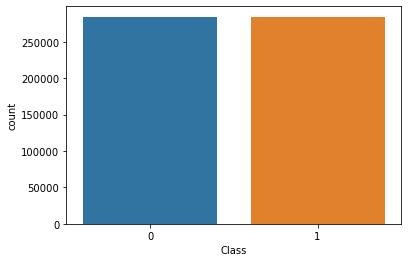

In [69]:
sns.countplot(x="Class",data=test_over);

# Balancing the datasets using imblearn

> Undersampling

In [75]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [76]:
rus = RandomUnderSampler(random_state=42,replacement=True)

In [79]:
x_rus,y_rus = rus.fit_resample(X,y)

In [80]:
y.shape

(284807,)

In [82]:
y_rus.shape

(984,)

In [84]:
x_rus.shape

(984, 30)

> Oversampling

In [85]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [87]:
x_ros,y_ros = ros.fit_resample(X,y)

In [88]:
y.shape

(284807,)

In [89]:
y_ros.shape

(568630,)

In [90]:
x_ros.shape

(568630, 30)

# Using SMOTE(Synthetic Minority Oversampling Technique)

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
smote = SMOTE()

In [93]:
x_smote,y_smote = smote.fit_resample(X,y)

In [94]:
y_smote.shape

(568630,)

In [95]:
x_smote.shape


(568630, 30)

In [103]:
import pickle
pickle.dump(boost_model,open('balancing_data.pkl','wb'))